In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

df = pd.read_csv("../data/processed/cleaned_properties.csv")

## Define target model

In [5]:

target = "price"
features = [
    "size_sqm", "bedrooms", "bathrooms", "price_per_sqm",
    "property_type", "purpose", "furnishing", "completion",
    "city", "source"
]

X = df[features]
y = df[target]


## train

In [7]:

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## model

In [10]:

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
# 🧾 Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [12]:

print(f"📊 R² Score: {r2:.2f}")
print(f"📉 MAE: {mae:.2f} OMR")


📊 R² Score: 0.33
📉 MAE: 121580.35 OMR


📊 R² Score: 0.33
📉 MAE: 121580.35 OMR


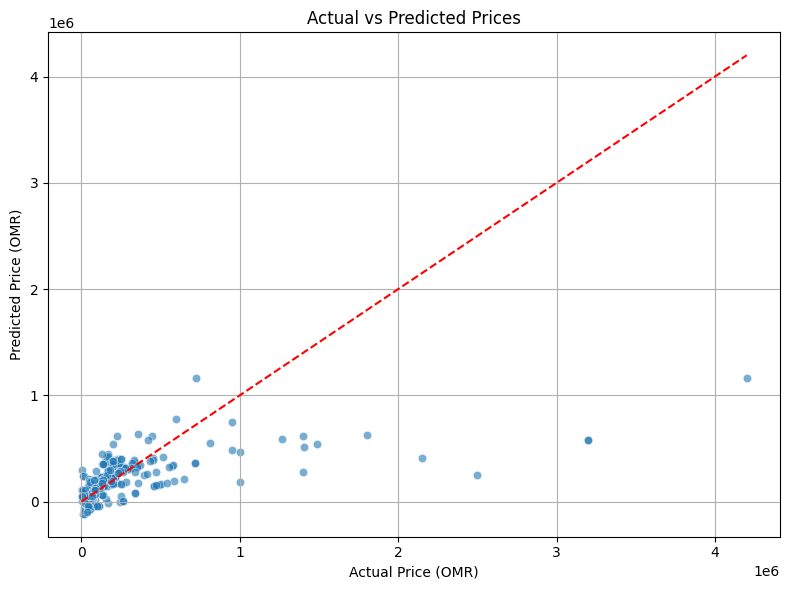

In [ ]:









# 📉 Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price (OMR)")
plt.ylabel("Predicted Price (OMR)")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()
